<a href="https://colab.research.google.com/github/labasubagia/dashboard-ecommerce/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce
- **Nama:** Kadek Laba Subagia
- **Email:** labasubagia22@gmail.com
- **ID Dicoding:** labasubagia22


## Menentukan Pertanyaan Bisnis

- Berapa banyak penjualan yang ada setiap bulannya?
- Manakah seller dengan performa penjualan terbaik dan terburuk?
- Manakah seller dengan rating terbaik dan terburuk?

## Import Semua Packages/Library yang Digunakan

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [66]:
# download data
if not os.path.exists('dataset.zip'):
    !gdown 1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK -O dataset.zip
    print('dataset.zip downloaded')
else:
    print("dataset.zip already exists.")

# extract data
DIR = os.path.join('.', 'E-Commerce Public Dataset')
if not os.path.exists(DIR):
    !unzip -o dataset.zip
    print("dataset extracted.")
else:
    print("dataset already extracted.")

dataset.zip already exists.
dataset already extracted.


In [67]:
order_item_df = pd.read_csv(os.path.join(DIR, 'order_items_dataset.csv'))
order_item_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [68]:
order_review_df = pd.read_csv(os.path.join(DIR, 'order_reviews_dataset.csv'))
order_review_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [69]:
order_df = pd.read_csv(os.path.join(DIR, 'orders_dataset.csv'))
order_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [70]:
customer_df = pd.read_csv(os.path.join(DIR, 'customers_dataset.csv'))
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [71]:
product_df = pd.read_csv(os.path.join(DIR, 'products_dataset.csv'))
product_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [72]:
dfs = [
    ('product_df', product_df),
    ('customer_df', customer_df),
    ('order_df', order_df),
    ('order_item_df', order_item_df),
    ('order_review_df', order_review_df),
]

### Assessing Data

In [73]:
# check data type
for name, df in dfs:
    print(f'Data {name}')
    print(df.info())
    print()

Data product_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Data customer_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------ 

**Insight:**

order_df
- kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date belum dalam bentuk date
- order_status belum dalam bentuk data kategorikal

order_item_df
- shipping_limit_date belum dalam bentuk date

order_review_df
- review_creation_date, review_answer_timestamp belum dalam bentuk date

In [74]:
# check is NaN
for name, df in dfs:
    print(f'Data {name}')
    print(df.isna().sum())
    print()

Data product_df
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Data customer_df
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data order_df
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data order_item_df
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price  

**Insight:**

product_df
- terdapat data NaN pada product_category_name
- data NaN ini perlu dicek apakah terkait dengan order atau tidak

order_df
- terdapat beberapa kolom yang merupakan NaN seperti order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- data NaN tersebut perlu dicek apakah ada kaitannya dengan order_status

order_review_df
- review_comment_title, review_comment_message memang bisa memiliki value NaN dimana customer hanya memberi rating tanpa komentar, jadi sebaiknya data ini tidak dihapus

In [75]:
product_df_null = product_df[product_df['product_category_name'].isna()]
product_ids_null = product_df_null['product_id'].tolist()

products_not_in_orders = []
for product_id in product_ids_null:
    if product_id not in order_item_df['product_id'].values:
        products_not_in_orders.append(product_id)

print(product_df[product_df['product_id'].isin(products_not_in_orders)])


Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


**Insight**

product_df
- semua product_category_name yang NaN dibeli di order_item, sehingga perlu dilabeli dengan label khusus misalnya `other`

In [76]:
# cek data null dari order
order_df[order_df.isna().any(axis=1)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [77]:
# cek data order yang semuanya terisi
order_df[~order_df.isna().any(axis=1)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight**

order_df dengan status `delivered` dan order_delivered_customer_date tidak NaN merupakan data order yang valid karena merupakan order yang sudah sampai di customer,
data ini yang akan digunakan sebagai basis analisis

In [78]:
# check duplicate
for name, df in dfs:
    print(f'Data {name}')
    print(df.duplicated().sum())
    print()

Data product_df
0

Data customer_df
0

Data order_df
0

Data order_item_df
0

Data order_review_df
0



**Insight:**
tidak ditemukan duplikat

### Cleaning Data

In [79]:
# CHANGE DATA TYPE

# order_df
order_df['order_status'] = order_df['order_status'].astype('category')
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
]
for column in date_columns:
    order_df[column] = pd.to_datetime(order_df[column])
print(order_df.info(),'\n')

# order_item_df
date_columns = ['shipping_limit_date']
for column in date_columns:
    order_item_df[column] = pd.to_datetime(order_item_df[column])
print(order_item_df.info(),'\n')

# order_review_df
date_columns = [
    'review_creation_date',
    'review_answer_timestamp',
]
for column in date_columns:
    order_review_df[column] = pd.to_datetime(order_review_df[column])
print(order_review_df.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Nul

In [80]:
# Handle NaN

# order_item_df
order_item_df = order_item_df.dropna(axis=0)
print('order_item_df\n',order_item_df.isna().sum(),'\n')

# product_df
product_df.fillna({'product_category_name':'other'}, inplace=True)
print('product_df\n',product_df.isna().sum(),'\n')

order_item_df
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

product_df
 product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 



**Insight**

product_df
- kolom NaN selain product_category_name, biarkan saja karena hanya informasi deskripsi

## Exploratory Data Analysis (EDA)

### Explore ...

In [81]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [82]:
# coba petakan customer berdasarkan city
customer_by_city = customer_df.groupby(by="customer_city", as_index=False).agg({
    "customer_id": "nunique",
})
customer_by_city.sort_values(by="customer_id", ascending=False, inplace=True)
customer_by_city.rename(columns={'customer_id': 'customer_count'}, inplace=True)
customer_by_city['percentage'] = customer_by_city['customer_count'] / customer_by_city['customer_count'].sum()
customer_by_city.head()

,customer_city,customer_count,percentage
3597,sao paulo,15540,0.156274
3155,rio de janeiro,6882,0.069207
453,belo horizonte,2773,0.027886
558,brasilia,2131,0.021430
1143,curitiba,1521,0.015296


**Insight**
- kota dengan customer terbanyak adalah sao paulo dengan 15540 orang yang mencakup 15.6% dari total user,
- kota dengan customer terbanyak kedia adalah rio de janeiro dengan 6882 orang yang mencakup 6.9% dari total user,
- basis customer dari kota lain masih dibawah 5%

In [83]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [84]:
# cek produk by category
product_by_category = product_df.groupby(by="product_category_name", as_index=False).agg({
    "product_id": "nunique",
})
product_by_category.rename(columns={'product_id':'product_count'}, inplace=True)
product_by_category.sort_values(by="product_count", ascending=False, inplace=True)
product_by_category.reset_index(drop=True, inplace=True)
product_by_category['percentage'] = product_by_category['product_count'] / product_by_category['product_count'].sum()
product_by_category.head(10)

,product_category_name,product_count,percentage
0,cama_mesa_banho,3029,0.091924
1,esporte_lazer,2867,0.087008
2,moveis_decoracao,2657,0.080635
3,beleza_saude,2444,0.074171
4,utilidades_domesticas,2335,0.070863
5,automotivo,1900,0.057661
6,informatica_acessorios,1639,0.049741
7,brinquedos,1411,0.042821
8,relogios_presentes,1329,0.040333
9,telefonia,1134,0.034415


**Insight**

persebaran product category cukup merata dapat dilihat jarak persentase tidak lebih dari 5%

In [85]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [86]:
# cek berapa lama order sampai di customer dan keterlambatannya
order_delivery_df = order_df[~order_df['order_purchase_timestamp'].isna() & ~order_df['order_delivered_customer_date'].isna()].copy()

order_delivery_df = order_delivery_df.assign(delivery_time = (order_delivery_df['order_delivered_customer_date'] - order_delivery_df['order_purchase_timestamp']).dt.days)
order_delivery_df = order_delivery_df.assign(estimated_time = (order_delivery_df['order_estimated_delivery_date'] - order_delivery_df['order_purchase_timestamp']).dt.days)
order_delivery_df = order_delivery_df.assign(is_late = order_delivery_df['order_delivered_customer_date'] > order_delivery_df['order_estimated_delivery_date'])

order_delivery_df = order_delivery_df[['order_id', 'estimated_time', 'delivery_time', 'is_late']]
order_delivery_df.describe(include='all',percentiles=[.25,.5,.75,.79,.80,.90])


,order_id,estimated_time,delivery_time,is_late
count,96476,96476.000000,96476.000000,96476
unique,96476,NaN,NaN,2
top,e481f51cbdc54678b7cc49136f2d6af7,NaN,NaN,False
freq,1,NaN,NaN,88649
mean,NaN,23.374228,12.094086,NaN
std,NaN,8.760830,9.551746,NaN
min,NaN,2.000000,0.000000,NaN
25%,NaN,18.000000,6.000000,NaN
50%,NaN,23.000000,10.000000,NaN
75%,NaN,28.000000,15.000000,NaN


In [87]:
# cek lebih lanjut waktu delivery yang lama
order_delivery_df[order_delivery_df['delivery_time'] > 30].sort_values(by=['delivery_time', 'estimated_time'], ascending=False).head(5)

,order_id,estimated_time,delivery_time,is_late
19590,ca07593549f1816d26a572e06dc1eab6,28,209,True
55619,1b3190b2dfa9d789e1f14c05b647a14a,19,208,True
61610,440d0d17af552815d15a9e41abe49359,30,195,True
70307,2fb597c2f772eca01b1f5c561bf6cc7b,39,194,True
38509,0f4519c5f1c541ddec9f21b3bddd533a,32,194,True


In [88]:
# cek lebih lanjut waktu estimated yang lama
order_delivery_df[order_delivery_df['estimated_time'] > 30].sort_values(by=['estimated_time', 'delivery_time'], ascending=False).head(5)

,order_id,estimated_time,delivery_time,is_late
57160,eec7f369423b033e549c02f3c5381205,155,20,False
40094,0607f0efea4b566f1eb8f7d3c2397320,149,3,False
15791,c72727d29cde4cf870d569bf65edabfd,146,6,False
86444,c2bb89b5c1dd978d507284be78a04cb2,140,16,False
67488,40dc2ba6f322a17626aac6244332828c,116,7,False


In [89]:
order_delivery_df[
    (order_delivery_df['estimated_time'] > 30) &
    (order_delivery_df['is_late'] == True)
].sort_values(by=['estimated_time', 'delivery_time'], ascending=[True, False]).head(5)

,order_id,estimated_time,delivery_time,is_late
3202,4f39a94d6e474819d898d6df7d394996,31,143,True
95136,17cc6728043d53cc948551dfbf0a338b,31,142,True
96550,201ebbf7634b25abd400f84d519cf297,31,99,True
83149,c5c439c95db69979fd8f66c6eec564e5,31,86,True
89219,7e8641c6ba8f77235152dd1c3356f814,31,86,True


**Insight**
- waktu delivery rata-rata adalah 12 hari, tercepat 6 hari
- waktu terlama adalah 209 hari, order-order lama ini juga terlambat jauh dari estimasi
- pemberian estimasi juga sampai diatas 30 hari, ada yang telat dan ada yang tidak
- ini menjadi inidikasi perlu optimasi pada proses delivery
- 80% order sampai dalam 30 hari


In [90]:
order_item_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [91]:
# cari seller dengan revenue terbanyak
seller_revenue_df = order_item_df.groupby('seller_id').agg({
    'price': 'sum',
    'order_id': 'nunique',
})
seller_revenue_df.sort_values(by=['price','order_id'], ascending=False, inplace=True)
seller_revenue_df.reset_index(inplace=True)
seller_revenue_df.rename(columns={'price': 'revenue', 'order_id': 'order_count'},inplace=True)
seller_revenue_df

,seller_id,revenue,order_count
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1132
1,53243585a1d6dc2643021fd1853d8905,222776.05,358
2,4a3ca9315b744ce9f8e9374361493884,200472.92,1806
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,585
4,7c67e1448b00f6e969d365cea6b010ab,187923.89,982
...,...,...,...
3090,34aefe746cd81b7f3b23253ea28bef39,8.00,1
3091,702835e4b785b67a084280efca355756,7.60,1
3092,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1
3093,77128dec4bec4878c37ab7d6169d6f26,6.50,1


In [92]:
seller_revenue_df.describe(include='all', percentiles=[0.25, 0.5, 0.6, 0.75, 0.8, 0.85, 0.9])

,seller_id,revenue,order_count
count,3095,3095.000000,3095.000000
unique,3095,NaN,NaN
top,4869f7a5dfa277a7dca6462dcf3b52b2,NaN,NaN
freq,1,NaN,NaN
mean,NaN,4391.484233,32.313409
std,NaN,13921.997192,105.139763
min,NaN,3.500000,1.000000
25%,NaN,208.850000,2.000000
50%,NaN,821.480000,6.000000
60%,NaN,1332.268000,10.000000


In [93]:
median_revenue = seller_revenue_df['revenue'].median()
median_order_count =  seller_revenue_df['order_count'].median()

print(f"median seller revenue: {median_revenue}")
print(f"median seller order count: {median_order_count}")

skew_revenue = seller_revenue_df['revenue'].skew()
skew_order_count = seller_revenue_df['order_count'].skew()

print(f"skew seller revenue: {skew_revenue}")
print(f"skew seller order count: {skew_order_count}")

median seller revenue: 821.48
median seller order count: 6.0
skew seller revenue: 9.048144726211094
skew seller order count: 9.64121806831566


**Insight**
- 80% persen seller memiliki order_count dibawah rata-rata, ini adalah PR
- skewness 9 (miring kanan), mengindikasikan bahwa hanya sebagian kecil dari seller yang memiliki revenue tinggi, ini juga terlihat dari median: 821.48 yang cukup jauh dengan mean: 4391.484233
- skewness pada order_count menunjukan setengah dari keseluruhan seller memiliki order kurang dari 6
- insight diatas menunjukkan perlunya action untuk memprbaiki permasalahan ini (program insentif, peningkatan efisiensi)

In [94]:
# cari top spender
top_spender_df = order_item_df.merge(order_df, how='inner').groupby('customer_id').agg({
    'price': 'sum',
    'freight_value': 'sum',
    'order_id': 'count',
})
top_spender_df['total_spending'] = top_spender_df['price'] + top_spender_df['freight_value']
top_spender_df.sort_values(by=['total_spending', 'order_id'], ascending=False, inplace=True)
top_spender_df.rename(columns={'order_id': 'order_count'},inplace=True)
top_spender_df.drop(columns=['price', 'freight_value'], inplace=True)
top_spender_df.describe(include='all', percentiles=[.25,.5,.75,.80,.90,.95,.99])

,order_count,total_spending
count,98666.000000,98666.000000
mean,1.141731,160.577638
std,0.538452,220.466087
min,1.000000,9.590000
25%,1.000000,61.980000
50%,1.000000,105.290000
75%,1.000000,176.870000
80%,1.000000,202.620000
90%,1.000000,307.685000
95%,2.000000,450.530000


**Insight**
- 90% customer belum melakukan repeat order, bahkan 99% baru melakukan 3 order

In [95]:
order_review_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [96]:
rating_df = order_review_df.groupby('review_score').agg({
    'review_id': 'count',
}).rename(columns={'review_id': 'review_count'}).sort_values(by='review_score', ascending=False).reset_index()
rating_df['percentage'] = rating_df['review_count'] / rating_df['review_count'].sum()
rating_df

,review_score,review_count,percentage
0,5,57328,0.577763
1,4,19142,0.192917
2,3,8179,0.082430
3,2,3151,0.031756
4,1,11424,0.115133


**Insight**
- persentase kepuasan customer mencapai 77% (rating 5 + rating 4),
- presentase kurang puas mencapai 14% (rating 1 + rating 2)
- ketidakpuasan cukup tinggi, ini menjadi PR bagaimana meningkatkan kualitas dari layanan dan product

In [97]:
# price per order
order_item_df['total_per_item'] = order_item_df['price'] + order_item_df['freight_value']
order_value_by_id = order_item_df.groupby('order_id',as_index=False)['total_per_item'].sum()
order_value_by_id.rename(columns={'total_per_item': 'total_order_price'}, inplace=True)

# gabungkan menjadi 1 data
df = customer_df.merge(order_df, on='customer_id')
df = df.merge(order_review_df, on='order_id', how='left')
df = df.merge(order_value_by_id, on='order_id')
df = df.merge(order_item_df, on='order_id')
df = df.merge(product_df, on='product_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113314 non-null  object        
 1   customer_unique_id             113314 non-null  object        
 2   customer_zip_code_prefix       113314 non-null  int64         
 3   customer_city                  113314 non-null  object        
 4   customer_state                 113314 non-null  object        
 5   order_id                       113314 non-null  object        
 6   order_status                   113314 non-null  category      
 7   order_purchase_timestamp       113314 non-null  datetime64[ns]
 8   order_approved_at              113299 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112111 non-null  datetime64[ns]
 10  order_delivered_customer_date  110839 non-null  datetime64[ns]
 11  

**Insight**

Relasi data pada e-commerce
- customer 1 -> n order
- order 1 -> n order_item
- order 1 -> 1 order_rating
- order_item 1 -> 1 seller


Hal yang bisa diketahui
- dalam satu order customer dapat membeli ke seller berbeda, sehingga rating satu order dishare oleh beberapa seller


In [98]:
df = df[[
    'review_score',
    'order_id',
    'customer_id',
    'customer_city',
    'order_status',
    'order_purchase_timestamp',
    'total_order_price',
    'product_id',
    'product_category_name',
    'seller_id',
    'total_per_item',
    'price',
]]
df = df.sort_values(by='order_id').reset_index(drop=True)
df

,review_score,order_id,customer_id,customer_city,order_status,order_purchase_timestamp,total_order_price,product_id,product_category_name,seller_id,total_per_item,price
0,5.0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,delivered,2017-09-13 08:59:02,72.19,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,48436dade18ac8b2bce089ec2a041202,72.19,58.90
1,4.0,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,delivered,2017-04-26 10:53:06,259.83,e5f2d52b802189ee658865ca93d83a8f,pet_shop,dd7ddc04e1b6c2c614352b383efe2d36,259.83,239.90
2,5.0,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,para de minas,delivered,2018-01-14 14:33:31,216.87,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,5b51032eddd242adc84c38acab88f23d,216.87,199.00
3,4.0,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,atibaia,delivered,2018-08-08 10:00:35,25.78,7634da152a4610f1595efa32f14722fc,perfumaria,9d7a1d34a5052409006425275ba1c2b4,25.78,12.99
4,5.0,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,delivered,2017-02-04 13:57:51,218.04,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,df560393f3a51e74553ab94004ba5c87,218.04,199.90
...,...,...,...,...,...,...,...,...,...,...,...,...
113309,5.0,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,sao luis,delivered,2018-04-23 13:57:06,343.40,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,b8bc237ba3788b23da09c0f1f3a3288c,343.40,299.99
113310,5.0,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,curitiba,delivered,2018-07-14 10:26:46,386.53,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,f3c38ab652836d21de61fb8314b69182,386.53,350.00
113311,5.0,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,sao paulo,delivered,2017-10-23 17:07:56,116.85,72a30483855e2eafc67aee5dc2560482,esporte_lazer,c3cfdc648177fdbbbb35635a37472c53,116.85,99.90
113312,5.0,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,vinhedo,delivered,2017-08-14 23:02:59,64.71,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,2b3e4a2a3ea8e01938cabda2a3e5cc79,64.71,55.99


In [99]:
df.to_csv('main_data.csv')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak penjualan yang ada setiap bulannya?

In [100]:
# montly data
monthly_orders_df = df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "total_order_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_order_price": "revenue"
}, inplace=True)
monthly_orders_df.sort_values(by='order_purchase_timestamp', ascending=True, inplace=True)

# hapus data bulan terakhir karena besar kemungkinan belum semua data masuk
# analisis saat ini hanya pada data dengan status delivered,
# kemungkinan ketika penarikah data masih terjadi proses shipping
monthly_orders_df = monthly_orders_df[:-1]

monthly_orders_df.head()


,order_purchase_timestamp,order_count,revenue
0,2016-09,3,777.90
1,2016-10,308,73747.74
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,789,189493.17


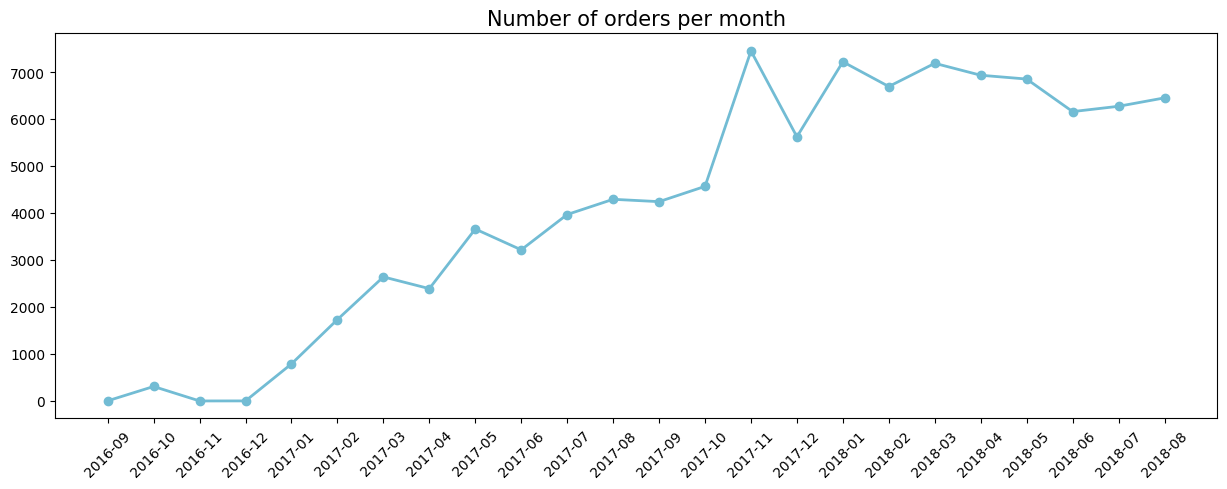

In [101]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_orders_df.order_purchase_timestamp, monthly_orders_df.order_count, marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of orders per month", loc='center', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight**
- salam jangka panjang terjadi peningkatan penjualan, ini menandakan adanya pertumbuhan perusahaan
- hal yang perlu diingat, 90% customer belum melakukan repeat order, bahkan 99% baru melakukan 3 order

### Pertanyaan 2: Manakah seller dengan performa penjualan terbaik dan terburuk?




In [102]:
order_per_seller_df = df.groupby('seller_id').agg({
    'price': 'sum',
    'order_id': 'count',
})
order_per_seller_df = order_per_seller_df.rename(columns={
    'price': 'revenue',
    'order_id': 'order_count',
}).sort_values(by=['revenue', 'order_count'], ascending=False)

order_per_seller_df

,revenue,order_count
seller_id,,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1156
53243585a1d6dc2643021fd1853d8905,222776.05,410
4a3ca9315b744ce9f8e9374361493884,202999.12,2009
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,586
7c67e1448b00f6e969d365cea6b010ab,189417.67,1375
...,...,...
34aefe746cd81b7f3b23253ea28bef39,8.00,1
702835e4b785b67a084280efca355756,7.60,1
1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1


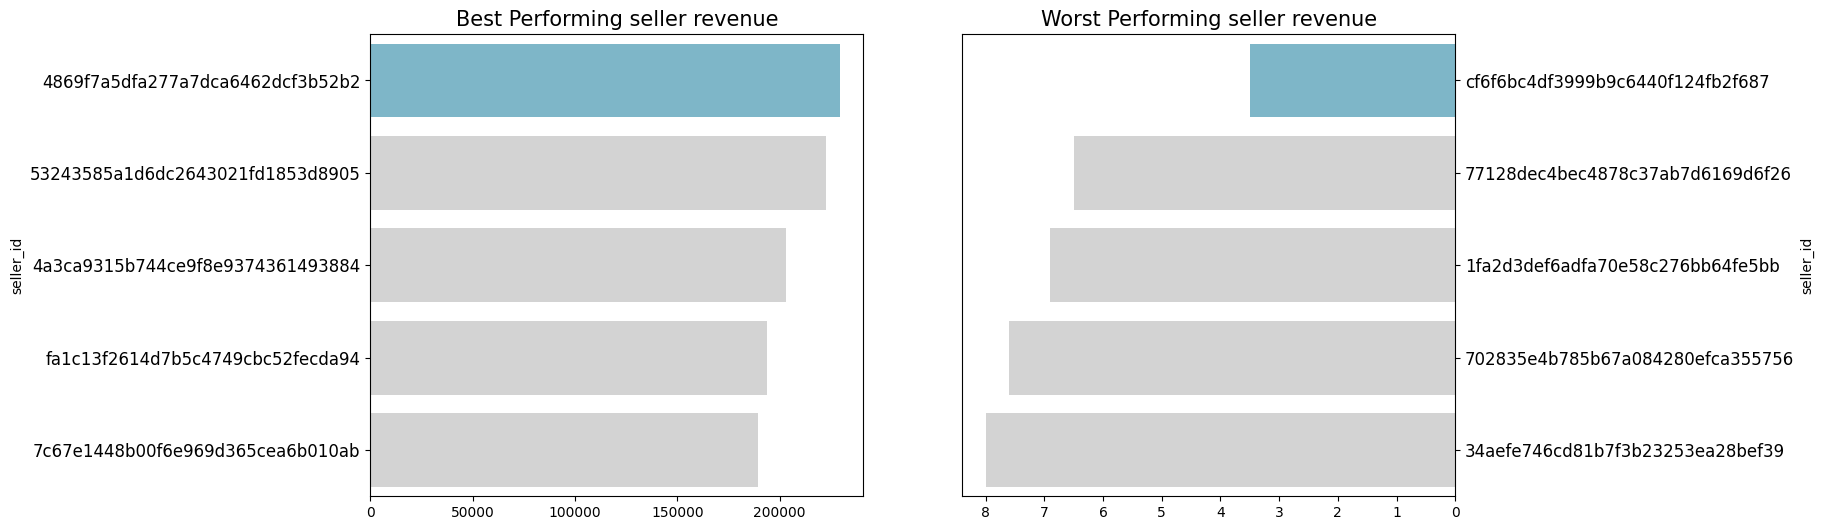

In [103]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='revenue', y='seller_id', hue='seller_id', data=order_per_seller_df.head(5), palette=colors, ax=ax[0])
# ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing seller revenue", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='revenue', y='seller_id', hue='seller_id', data=order_per_seller_df.sort_values(by='revenue', ascending=True).head(5), palette=colors, ax=ax[1])
# ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing seller revenue", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

### Pertanyaan 3: Manakah seller dengan rating terbaik dan terburuk?





In [104]:
order_seller_review_df = df[~df['review_score'].isna()].groupby('seller_id').agg({
    'review_score': 'mean',
    'order_id': 'nunique',
    'price': 'sum',
}).sort_values(by=['review_score', 'price', 'order_id'], ascending=False)

order_seller_review_df.rename(columns={
    'review_score': 'rating',
    'order_id': 'order_count',
    'prince': 'revenue',
}, inplace=True)

order_seller_review_df

,rating,order_count,price
seller_id,,,
ee27a8f15b1dded4d213a468ba4eb391,5.0,1,6499.0
2addf05f476d0637864454e93ba673d5,5.0,12,4552.0
585175ec331ea177fa47199e39a6170a,5.0,1,3549.0
dd58ee93286b0821565574c570e9e1dc,5.0,2,2948.0
458d868c9642f55f18f04e951a3fdde6,5.0,2,2718.0
...,...,...,...
6614814a00d344b846ae209f95ee7e3f,1.0,1,13.0
c1dde11f12d05c478f5de2d7319ad3b2,1.0,1,12.5
cc1f04647be106ba74e62b21f358af25,1.0,1,11.9


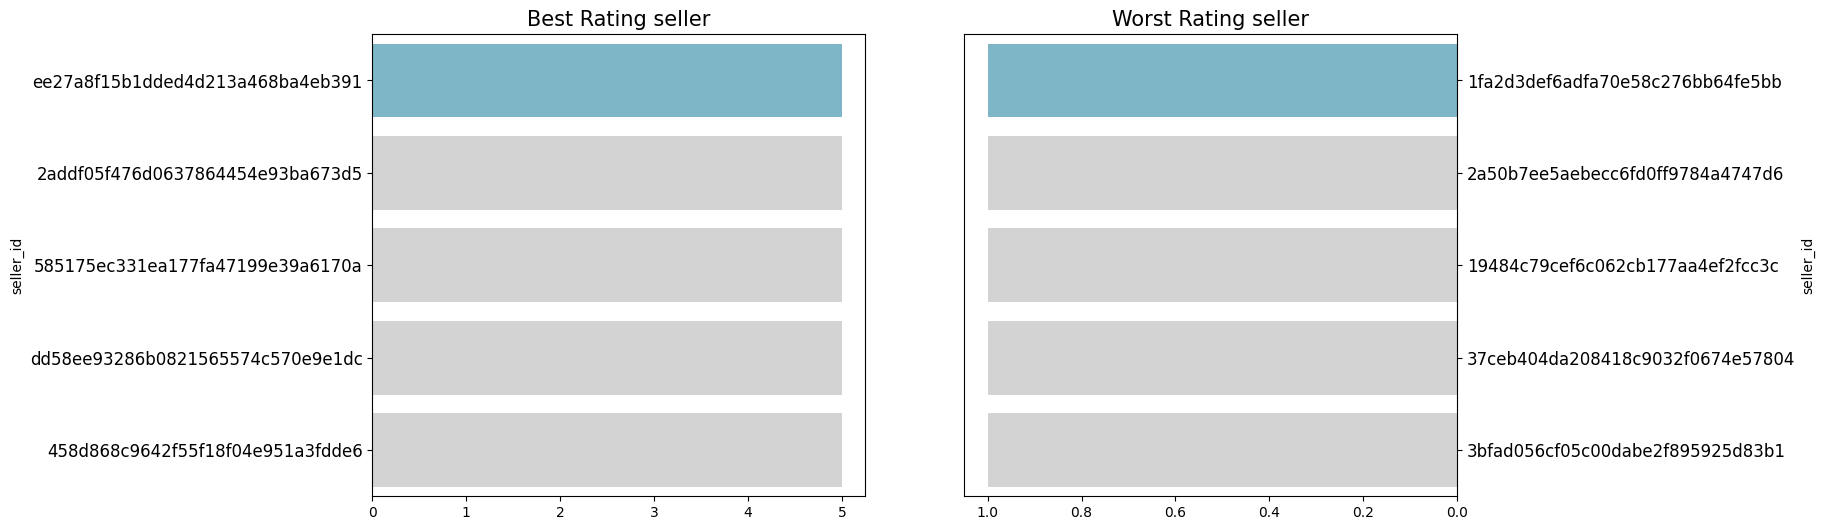

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='rating', y='seller_id', hue='seller_id', data=order_seller_review_df.head(5), palette=colors, ax=ax[0])
# ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Rating seller", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='rating', y='seller_id', hue='seller_id', data=order_seller_review_df.sort_values(by='rating', ascending=True).head(5), palette=colors, ax=ax[1])

# ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Rating seller", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

## Analisis Lanjutan (Opsional)

### Revenue seller

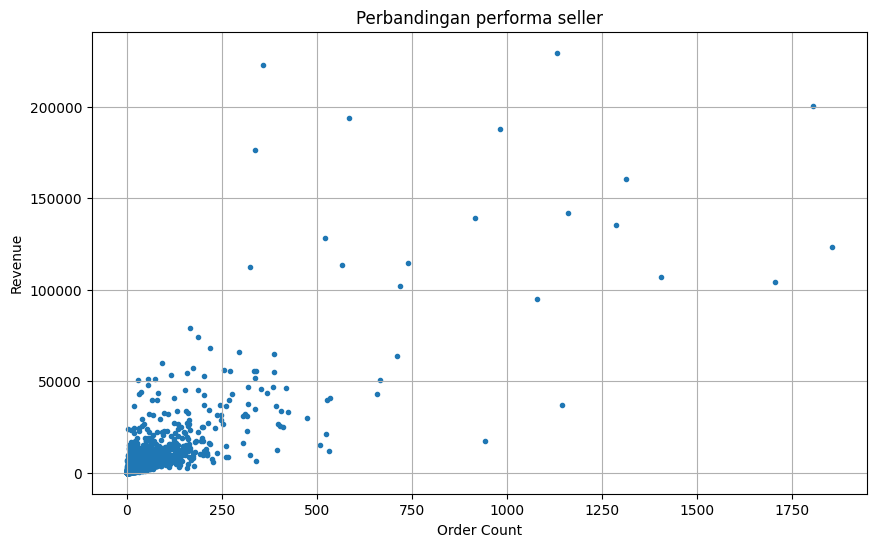

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(seller_revenue_df['order_count'], seller_revenue_df['revenue'], marker='.')
plt.xlabel('Order Count')
plt.ylabel('Revenue')
plt.title('Perbandingan performa seller')
plt.grid(True)
plt.show()


**Insight**
- Persebaran data paling banyak ada di kiri bawah mengindikasikan sebagian besar seller belum memiliki performa penjualan yang baik
- Seller dengan revenue tinggi namun penjualan tidak begitu banyak (kiri-atas) perlu meningkatkan jumlah penjualan/order_count (promosi, pembinaan, dll)
- Seller order count tinggi namun revenue rendah, perlu memikiran opsi menaikkan jumlah profit (e.g. bundling, upselling)
- Kiri-bawah perlu lebih banyak dukungan agar dapat lebih berkembang (pembinaan, biaya iklan murah)

### RFM (Recency, Frequency, Monetary)
- Recency,kapan pelangagan terakhir melakukan transaksi
- Frequency, seberapa sering pelanggan melakukan transaksi
- Monetary, seberapa besar revenue dari seorang pelangan

In [107]:
# rfm
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
max_date = df['order_purchase_timestamp'].max()
df['recency'] = (max_date - df['order_purchase_timestamp']).dt.days


frequency = df.groupby('customer_id')['order_id'].count().reset_index(name='frequency')
monetary_value = df.groupby('customer_id')['total_order_price'].sum().reset_index(name='monetary')

rfm_df = pd.merge(frequency, monetary_value, on='customer_id')

rfm_df = pd.merge(rfm_df, df[['customer_id','recency']], on='customer_id').sort_values(by='recency', ascending=True)

rfm_df.drop_duplicates(inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
33473,4b7decb9b58e2569548b8b4c8e20e8d7,1,166.46,0
38309,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,119.42,4
48715,6e353700bc7bcdf6ebc15d6de16d7002,1,61.29,4
101989,e60df9449653a95af4549bbfcb18a6eb,2,1021.92,4
82064,b8c19e70d00f6927388e4f31c923d785,1,178.25,4


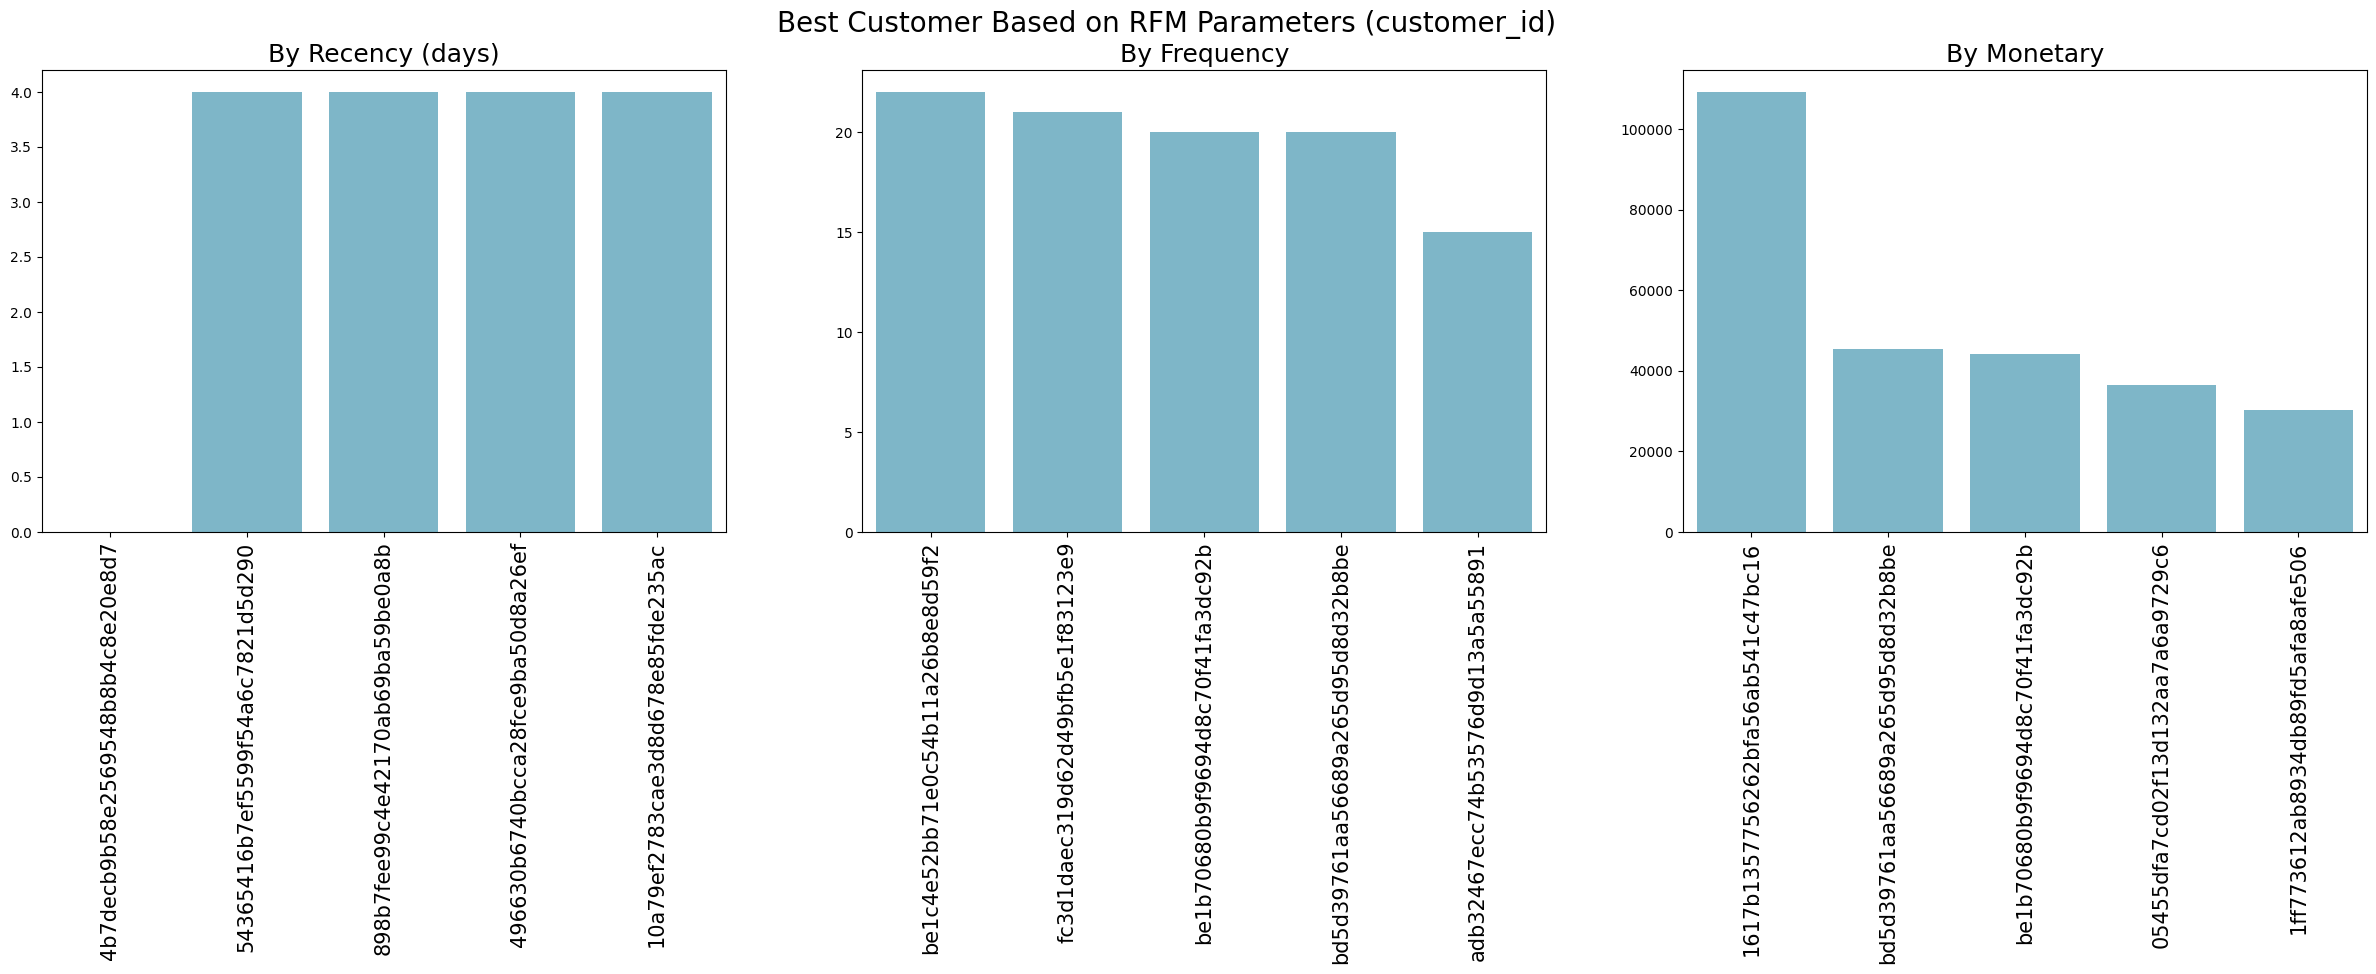

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
rot = 90

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=rot)

sns.barplot(y="frequency", x="customer_id",hue="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=rot)

sns.barplot(y="monetary", x="customer_id",hue="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=rot)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [109]:
# rfm_df.sort_values(by="monetary", ascending=False).head(5)

**Insight**

Recency
- satu pelanggan melakukan pembelian di hari yang sama ketika RFM dihitung
- 4 lainnya melakukan pembelian 4 hari sebelumnya

Frequency
- 5 customer terbaik dengan frequency berurutan 22, 21, 20, 20 dan 15

Monetary
- 5 customer terbaik denga monetary berurutan 109312.64, 45256.00, 44048.00, 36489.24, 30186.00

## Conclusion

**Conclution pertanyaan 1:**
- Terjadi Peningkatan penjualan dari tahun ke tahun
- Meski demikian, 90% customer belum repeat order menjadi warning bagi perusahaan.

**Conclution pertanyaan 2:**
- Seller dengan performa terbaik dan terburuk dapat dilihat pada visualisai
- perlu diingat bahwa sebagian besar seller memiliki revenue dan order count yang lebih rendah dari rata-rata karena hanya sebagian kecil seller yang memiliki revenue tinggi, sehingga perlu dukungan (pembinaan, biaya iklan murah/gratis, dll)

**Conclution pertantaan 3:**
- Seller dengan rating terbaik dan terburuk dapat dilihat pada visualisai
- Secara keseluruhan persentase kepuasan customer mencapai 77% (rating 5 + rating 4). Presentase kurang puas mencapai 14% (rating 1 + rating 2)
- ketidakpuasan cukup tinggi, bisa terjadi karena berbagai faktor, mislanya keterlambatan pengiriman (hanya 80% yang sampai dalam 30 hari), kualitas produk, kualitas pelayanan, dll. Perlu ditingkatkan untuk quality control